In [1]:
import pandas as pd
import quandl
#from the website
#get data from quandl for google data 
#create a data frame
##create a data frame 
quandl.ApiConfig.api_key = "zuiQMfguw3rRgLvkCzxk"
df = quandl.get('WIKI/GOOGL')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [2]:
#we need specfic information about this raw data the data which we can count
#we create a new data frame
#we need openning price 
#closing  price 
#low price and high price 
df1=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df1.head()
#df1 is the data that we analyze to predict the future

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


# percent volatility

In [3]:
#create a new label call HL_PCt which is percent volatility and add feture

df1['volatility']=(df1['Adj. High']-df1['Adj. Close'])/df1['Adj. Close']
df1['volatility'].head()

/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Date
2004-08-19    0.037126
2004-08-20    0.007109
2004-08-23    0.037294
2004-08-24    0.064175
2004-08-25    0.018868
Name: volatility, dtype: float64

In [4]:
#we need to add another feature and lable
df1['PCT_Change']=(df1['Adj. Close']-df1['Adj. Open'])/df1['Adj. Open'] 
df1['PCT_Change'].head()

/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Date
2004-08-19    0.003250
2004-08-20    0.072270
2004-08-23   -0.012279
2004-08-24   -0.057264
2004-08-25    0.011837
Name: PCT_Change, dtype: float64

In [5]:
#we got two new feature .now update the dataframe with updated with new information
df1=df1[['Adj. Close','volatility','PCT_Change','Adj. Open','Adj. Volume']]
df1.head()

,Adj. Close,volatility,PCT_Change,Adj. Open,Adj. Volume
Date,,,,,
2004-08-19,50.322842,0.037126,0.003250,50.159839,44659000.0
2004-08-20,54.322689,0.007109,0.072270,50.661387,22834300.0
2004-08-23,54.869377,0.037294,-0.012279,55.551482,18256100.0
2004-08-24,52.597363,0.064175,-0.057264,55.792225,15247300.0
2004-08-25,53.164113,0.018868,0.011837,52.542193,9188600.0


In [6]:
df1

,Adj. Close,volatility,PCT_Change,Adj. Open,Adj. Volume
Date,,,,,
2004-08-19,50.322842,0.037126,0.003250,50.159839,44659000.0
2004-08-20,54.322689,0.007109,0.072270,50.661387,22834300.0
2004-08-23,54.869377,0.037294,-0.012279,55.551482,18256100.0
2004-08-24,52.597363,0.064175,-0.057264,55.792225,15247300.0
2004-08-25,53.164113,0.018868,0.011837,52.542193,9188600.0
2004-08-26,54.122070,0.000371,0.028204,52.637487,7094800.0
2004-08-27,53.239345,0.023269,-0.018039,54.217364,6211700.0
2004-08-30,51.162935,0.034114,-0.031060,52.802998,5196700.0
2004-08-31,51.343492,0.013090,0.000489,51.318415,4917800.0


# predicted data will be comared with the Adj. Close data beause thats the forcast data column

In [7]:
forcast_col='Adj. Close'

In [8]:
# we cant work with the null value so we replace with them with a negative large number of value
df1.fillna(-999999,inplace=True)

In [9]:
import math

#lets see our forcase data 
df1[forcast_col][:10]

Date
2004-08-19    50.322842
2004-08-20    54.322689
2004-08-23    54.869377
2004-08-24    52.597363
2004-08-25    53.164113
2004-08-26    54.122070
2004-08-27    53.239345
2004-08-30    51.162935
2004-08-31    51.343492
2004-09-01    50.280210
Name: Adj. Close, dtype: float64

In [10]:
#the length of the data frame is too big and we need to predict 
#1% of the data so lets narrow it down now
forcast_out=int(math.ceil(.1*len(df1)))
forcast_out


343

In [11]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
Y=df1[forcast_col]
x=range(len(df1[forcast_col]))

# forcast data

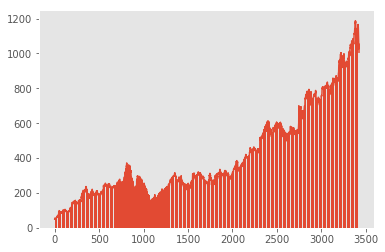

In [12]:
plt.grid()
plt.bar(x,Y)
plt.plot(x,Y)


In [13]:
#we will arrange it in a assending order with a new label
df1['label'] = df[forcast_col].shift(-forcast_out)

df1['label'].head()

Date
2004-08-19    214.005615
2004-08-20    210.725489
2004-08-23    208.072299
2004-08-24    218.288837
2004-08-25    223.309335
Name: label, dtype: float64

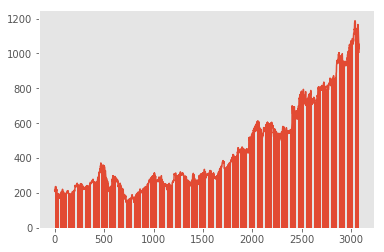

In [14]:
#plotting the modified version
y1=df1['label']
x1=range(len(df1['label']))
plt.bar(x1,y1)
plt.plot(x1,y1)
plt.grid()

In [15]:
#we need only data no label 
#so we drop every label
# take all the data to an array except the label

import numpy as np
from sklearn import preprocessing,cross_validation,svm
from sklearn.linear_model import LinearRegression
#X2=np.array(df1.drop(['label'],1)) #everything except label

X=np.array(df1.drop(['label'],1)) 

X=preprocessing.scale(X)
X=X[:-forcast_out]    # the data what is known
X_lately=X[-forcast_out:] #the data which is not known
df1.dropna(inplace=True)
 

Y=np.array(df1['label'])
#not always necessary

/root/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
#we create the trainig and testing data from the data we get
xtrain,xtest,ytrain,ytest=cross_validation.train_test_split(X,Y,test_size=0.25)

### data is created now we need a cllasifier

In [17]:
clf2 = LinearRegression()  # create a classifire object
clf2.fit(xtrain,ytrain) # train data related with fir() method
accuracy2=clf2.score(xtest,ytest) # test data related with score() method
print "the accuracy is "+str(accuracy2)

the accuracy is 0.8790607297303457


In [18]:
#now its time for forcasting the data
#forcast_set=clf.predict(X_lately)

## forcast value

In [19]:
#print forcast_set


# accuracy and forcast_out

In [20]:
print accuracy2

0.8790607297303457


In [21]:
from sklearn import svm
clf3 = svm.SVR()  # create a classifire object
clf3.fit(xtrain,ytrain) # train data related with fir() method
accuracy3=clf3.score(xtest,ytest) # test data related with score() method
print "the accuracy is "+str(accuracy3)

the accuracy is 0.7044610374940289


In [42]:
from sklearn import neighbors
n_neighbors=20
clf1 = neighbors.KNeighborsRegressor(n_neighbors)  # create a classifire object
clf1.fit(xtrain,ytrain) # train data related with fir() method
accuracy1=clf1.score(xtest,ytest) # test data related with score() method
print "the accuracy is "+str(accuracy1)


the accuracy is 0.9117575630114182


In [23]:
print forcast_out

343


In [24]:
def decision(accuracy1,accuracy2,accracy3):
    data=[accuracy1,accuracy2,accuracy3]
    result=max(data)
    if result == accuracy1:
        method = "KNN"
        
    elif result==accuracy2:
        method='LR'
    else:
        method='SVR'
    return method

In [25]:
best_method=decision(accuracy1,accuracy2,accuracy3)

In [26]:
print best_method

KNN


In [27]:
def create_prediction_data(best_method):
    if best_method=="KNN":
        forcast_set=clf1.predict(X_lately)
    elif best_method=="LR":
        forcast_set=clf2.predict(X_lately)
    else :
        forcast_set=clf3.predict(X_lately)
    return forcast_set

In [39]:
forcast_set=create_prediction_data(best_method)
forcast_set

array([ 744.811     ,  706.839     ,  733.438     ,  724.0895    ,
        725.1755    ,  762.865     ,  769.307     ,  744.205     ,
        825.331     ,  879.293     ,  886.7975    ,  851.44      ,
        793.477     ,  777.2465    ,  829.9405    ,  881.369     ,
        796.4365    ,  863.847     ,  834.269375  ,  856.5955    ,
        851.2565    ,  879.7495    ,  914.9275    ,  881.6835    ,
        844.2725    ,  867.653     ,  942.9475    ,  890.4905    ,
        902.101     ,  893.29825   ,  890.288     ,  898.01      ,
        872.553     ,  722.88109621,  666.07568102,  547.75125277,
        800.7625    ,  865.766     ,  808.7085    ,  832.878     ,
        802.004     ,  784.5105    ,  781.0805    ,  747.6435    ,
        758.0935    ,  791.8425    ,  789.413     ,  820.6125    ,
        827.405     ,  859.3095    ,  843.3355    ,  845.8165    ,
        811.910875  ,  841.929     ,  792.076     ,  840.7315    ,
        831.9135    ,  759.219     ,  762.7725    ,  781.7305 

In [29]:
import matplotlib.pyplot as plt
import datetime
from matplotlib import style
style.use('ggplot')

In [30]:
#now create another label for forcast data that we need
df1['forcast']=np.nan

In [31]:
df1['forcast'].head() #allthe data will be nan 
#after getting the data we will fill the data

Date
2004-08-19   NaN
2004-08-20   NaN
2004-08-23   NaN
2004-08-24   NaN
2004-08-25   NaN
Name: forcast, dtype: float64

#### the data has an index and it indexed by the date so if we want to plot our forcast data against the date we need find the date of every day from the beginning to the last date and there is a function of the dataframe which  is "df.iloc[1].name=first date" df.iloc[-1].name ==last date

In [32]:
last_date=df1.iloc[-1].name
last_date

Timestamp('2016-11-10 00:00:00')

In [33]:
last_unix=last_date.timestamp() #it is a function of the time module that can convert the time to
#a computer can understand

#### now 1 days is == 86400 seconds. so we iterate through the loop and add this seconds to the timestamp and we get the next day

In [34]:
one_day=86400 #in seconds
next_unix=last_unix+one_day  #next day

###  now why we doing this?? Actually computer does not understand that X and Y are co responding to each other.wheb we predict the X_lately value computer doesnot give the value with respect to the time .because computer doesnot know that.we need to manually do that and make the date and correspond with each other and each day should have a list of numbers(accroding to the matplot lib it will be multibar/plot graph) so when we iterate through the loop for each day we get a list

# now we populate the data with respect to time

In [35]:
for i in forcast_set:    # iterating through the forcast set
    next_date = datetime.datetime.fromtimestamp(next_unix) # find the next date for the data
    next_unix+=one_day  #increment for finding next date
    df1.loc[next_date] =[np.nan for item in range(len(df1.columns)-1)]+[i]  #settinf up the date as a
    #index and adding value of the forast_set element with nand (adding value with nand will replace 
    #the value of the nan

# we get everything now we plot the Adj. Close and forcast value

Text(0,0.5,'Price')

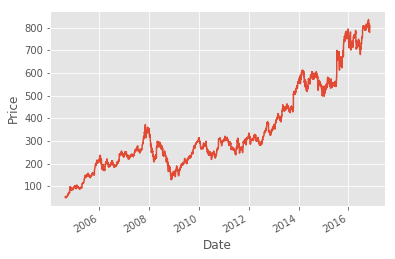

In [36]:

df1['Adj. Close'].plot()
plt.xlabel('Date')
plt.ylabel('Price')


# this is the previous data plot

Text(0,0.5,'Price')

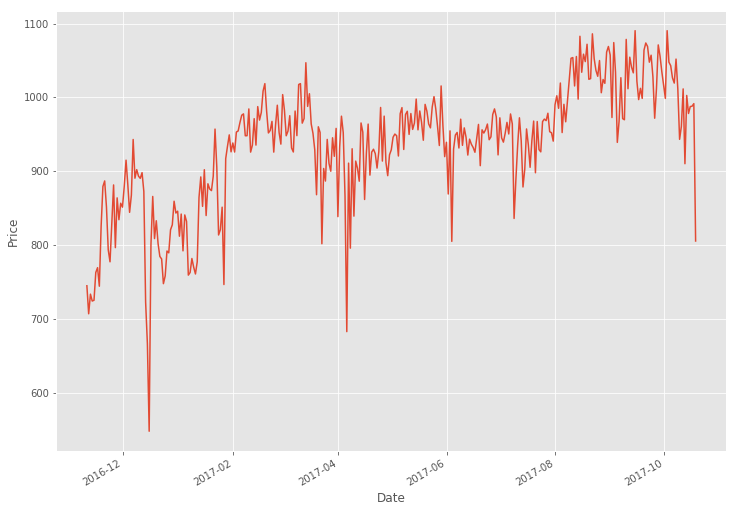

In [37]:
fig_size=[12,9]
#fig_size[0] = 12
#fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
df1['forcast'].plot()
plt.xlabel('Date')
plt.ylabel('Price')

# this ths the prediction after the day

# plotting togather we get


Text(0,0.5,'Price')

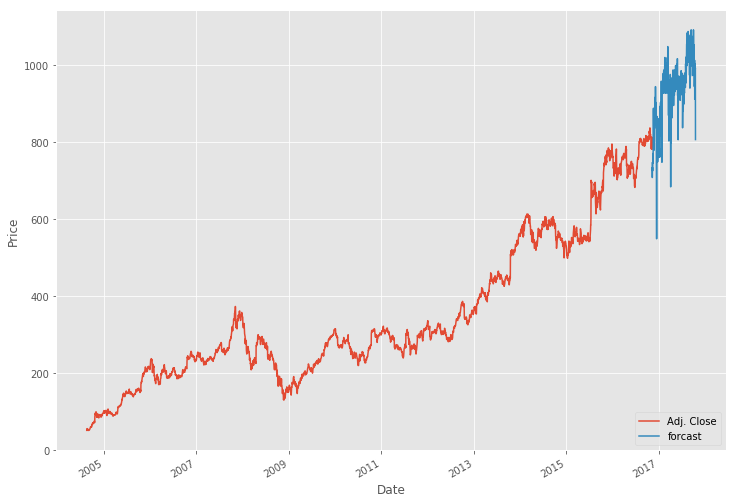

In [38]:
fig_size=[12,9]
#fig_size[0] = 12
#fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
df1['Adj. Close'].plot()
df1['forcast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
